In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('german_credit.csv')

In [12]:
df

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [13]:
df.isnull().sum() #To check weather it has null value or not

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [17]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

/Users/sauravlamichhane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Creditability', ylabel='count'>

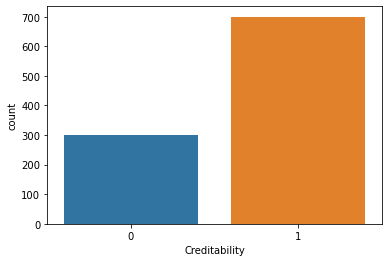

In [18]:
import seaborn as sns
sns.countplot(df['Creditability'])

# First method --Under sampling

In [20]:
import imblearn  #at first we need to install imblearn

In [21]:
from collections import Counter

In [23]:
X=df.drop('Creditability', axis=1)
y=df['Creditability']

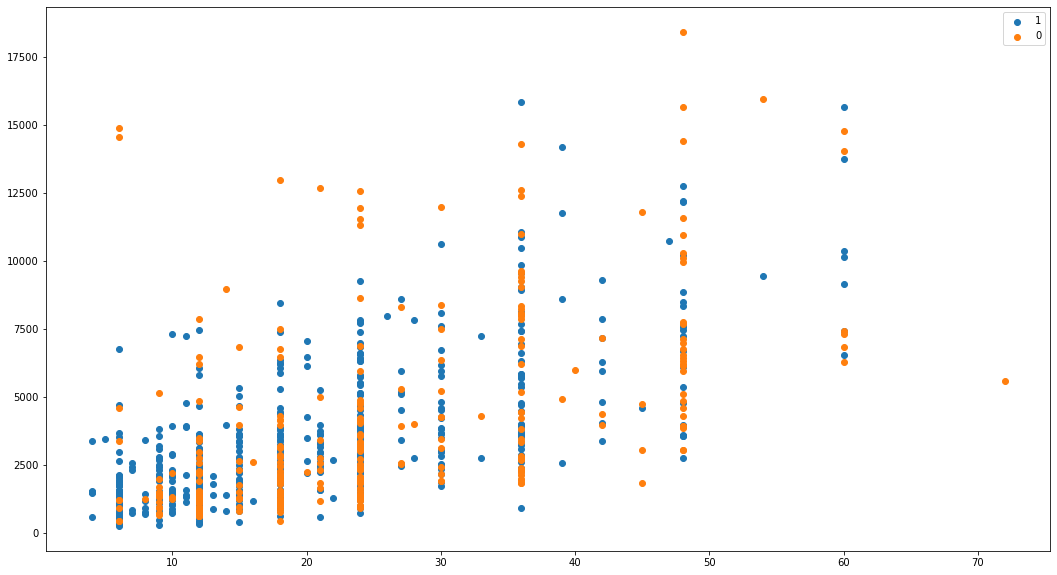

In [28]:

# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y)
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X.loc[row_ix, "Duration of Credit (month)"], X.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.savefig('Original.png')
plt.show()

# # Undersampling 1 - Random

After undersample dataset shape Counter({0: 300, 1: 300})


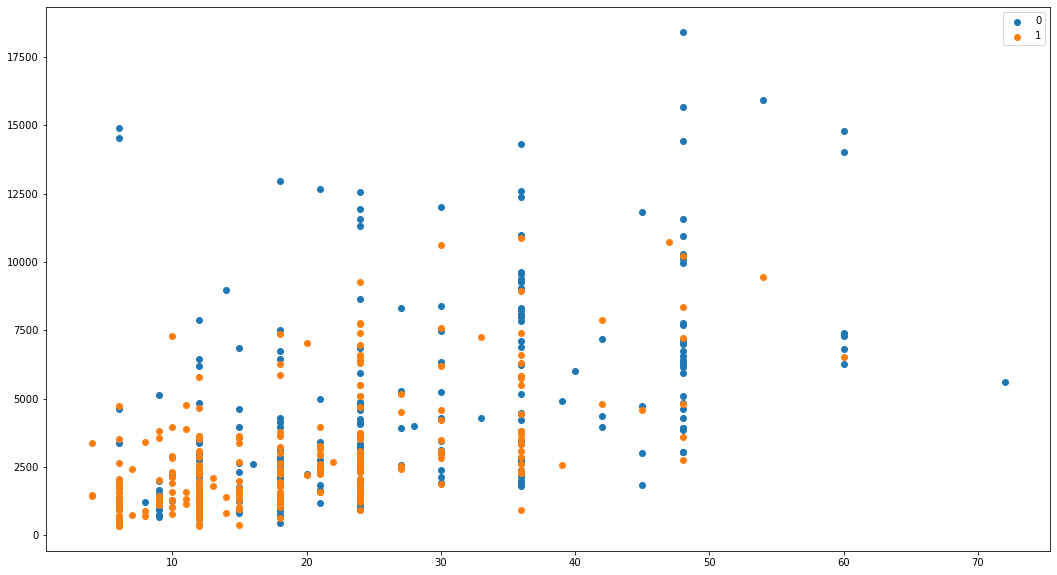

In [29]:
from imblearn.under_sampling import RandomUnderSampler 
rs = RandomUnderSampler(random_state=42)

#print('Original dataset shape %s' % Counter(y))

X_res, y_res = rs.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))

# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()


# Undersampling 2 - Centriod

Original dataset shape Counter({1: 700, 0: 300})


/Users/sauravlamichhane/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


After undersample dataset shape Counter({0: 300, 1: 300})


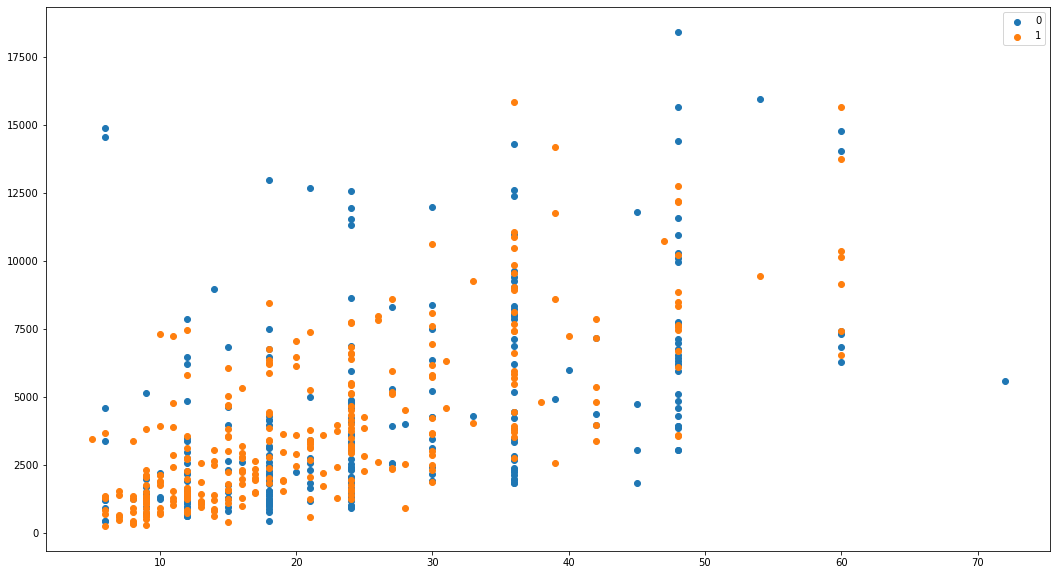

In [30]:
from imblearn.under_sampling import ClusterCentroids 
cc = ClusterCentroids(random_state=42)

print('Original dataset shape %s' % Counter(y))

X_res, y_res = cc.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))

# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# # Oversampling 1 - Random

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({1: 700, 0: 700})


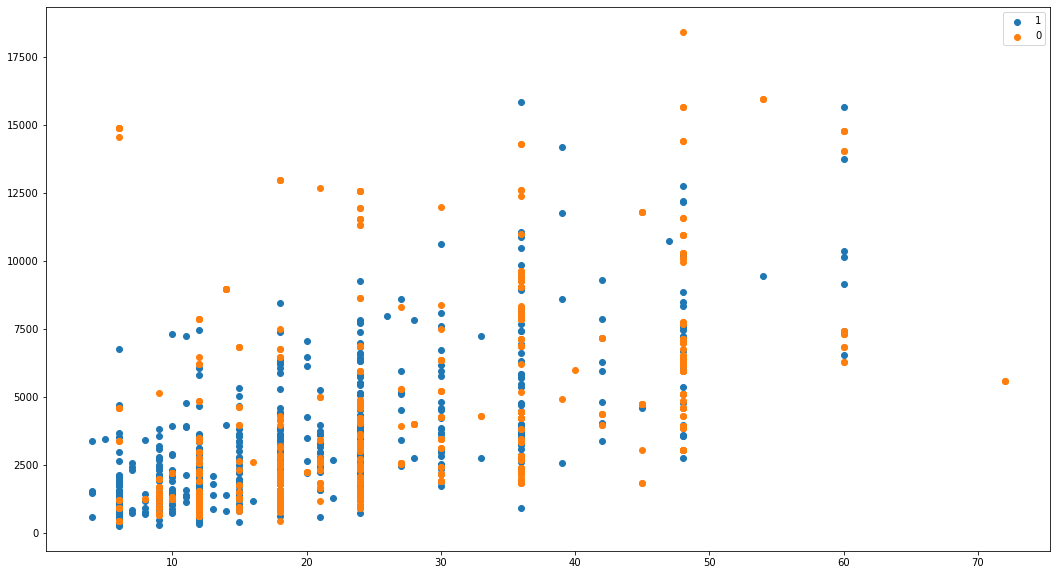

In [31]:
from imblearn.over_sampling import RandomOverSampler 
ROS = RandomOverSampler()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = ROS.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# Oversampling 2 - SMOTE (synthetic minority oversampling, here you dont duplicate the record you create the record (cobination of undersampling and over sampling) here you generate the synthetic data not original data

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({1: 700, 0: 700})


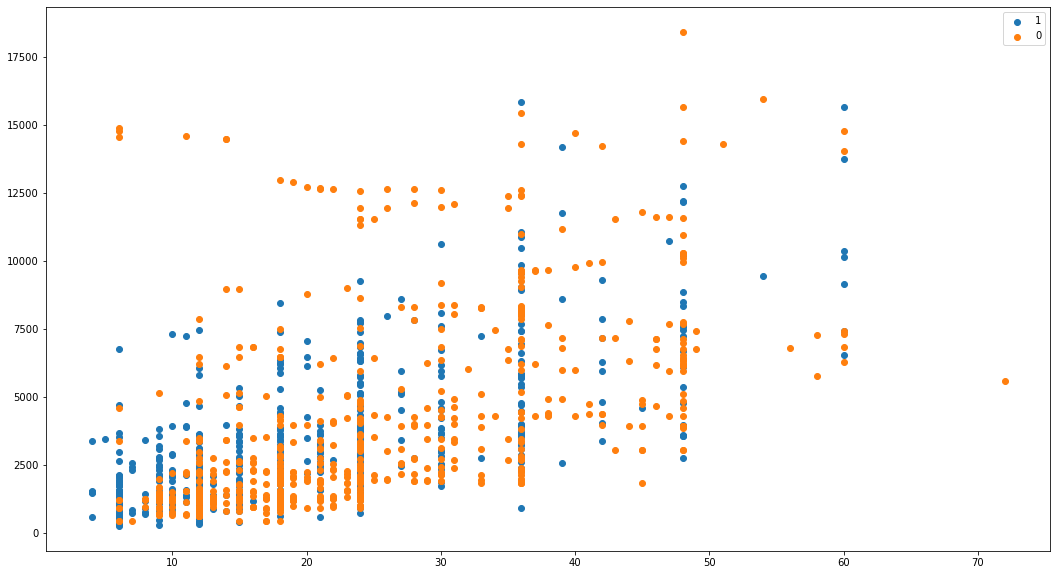

In [32]:
from imblearn.over_sampling import SMOTE 
SMOTE = SMOTE()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = SMOTE.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# # Undersampling 3 - ENN

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({0: 300, 1: 271})


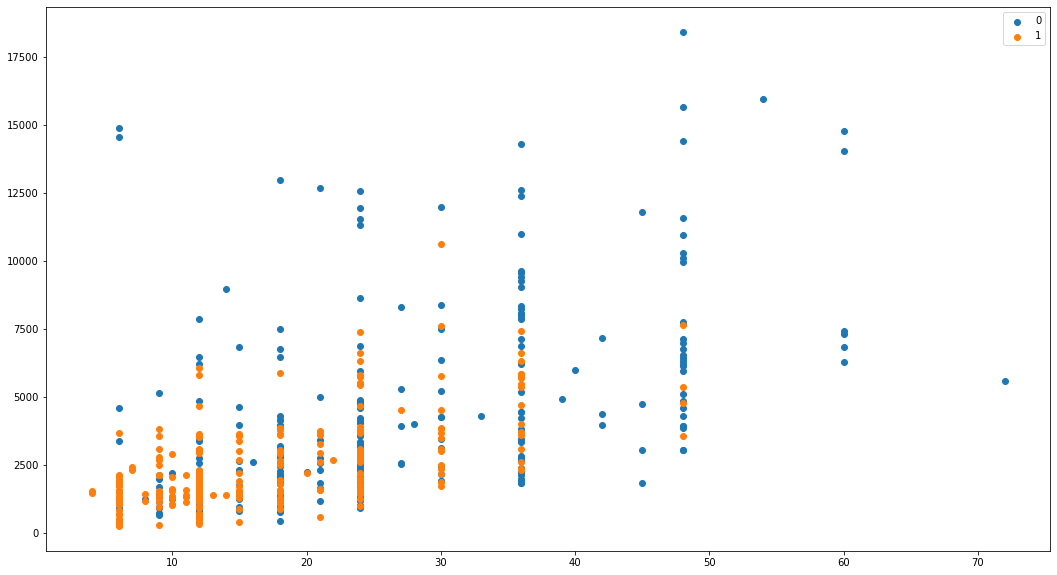

In [33]:
from imblearn.under_sampling import EditedNearestNeighbours
ENN = EditedNearestNeighbours()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = ENN.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# # Ensemble Method 1 - EasyEnsembleClassifier

In [34]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
print('Original dataset shape %s' % Counter(y))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train) 
y_pred = eec.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Original dataset shape Counter({1: 700, 0: 300})
[[ 58  25]
 [ 49 118]]


In [ ]:
an edge over my compititors. A Verified certificate will attach credibility to the certifcate i receive fron this course. ai paln to ccomplte all assignment on or before time s i ahve  done in previsous Coure]s. Also, I intend the other online courses I have taken on Courseera. I also paln to grade assignment that are to  peer-reviewed which I beleivewill an invaluable learningopportunity